In [2]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [3]:
h5f = h5py.File('C:\\Users\\DELL\\Downloads\\SVHN_single_grey1.h5', 'r')

In [4]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
X_test.shape

(18000, 32, 32)

In [7]:
X_train = X_train.reshape(42000, 32, 32, 1)
X_test = X_test.reshape(18000,32,32,1)

In [8]:
X_train.shape

(42000, 32, 32, 1)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
from tensorflow.keras.utils import to_categorical
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)
y_cat_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [12]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [13]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test), callbacks=[early_stop])

Epoch 1/10
1313/1313 [==============================] - 27s 19ms/step - loss: 1.5768 - accuracy: 0.4863 - val_loss: 0.6779 - val_accuracy: 0.8096
Epoch 2/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.6073 - accuracy: 0.8313 - val_loss: 0.5847 - val_accuracy: 0.8429
Epoch 3/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.5293 - accuracy: 0.8507 - val_loss: 0.5497 - val_accuracy: 0.8512
Epoch 4/10
1313/1313 [==============================] - 23s 18ms/step - loss: 0.4783 - accuracy: 0.8666 - val_loss: 0.5321 - val_accuracy: 0.8571
Epoch 5/10
1313/1313 [==============================] - 27s 21ms/step - loss: 0.4374 - accuracy: 0.8757 - val_loss: 0.5013 - val_accuracy: 0.8654
Epoch 6/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.4005 - accuracy: 0.8858 - val_loss: 0.5300 - val_accuracy: 0.8566
Epoch 7/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.3751 - accuracy: 0.8924 - val_loss: 0.4973 -

In [14]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

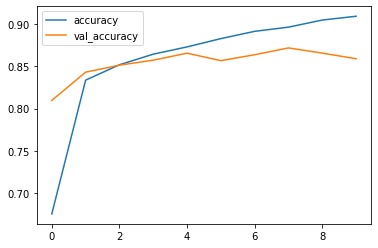

In [15]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

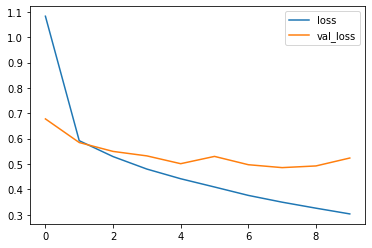

In [16]:
losses[['loss','val_loss']].plot()

In [17]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.5236612558364868, 0.8588333129882812]


In [18]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1814
           1       0.79      0.92      0.85      1828
           2       0.97      0.81      0.88      1803
           3       0.91      0.74      0.82      1719
           4       0.89      0.90      0.90      1812
           5       0.86      0.86      0.86      1768
           6       0.85      0.86      0.86      1832
           7       0.92      0.86      0.89      1808
           8       0.79      0.84      0.81      1812
           9       0.80      0.87      0.84      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



In [19]:
y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

In [20]:
my_number = X_test[1]

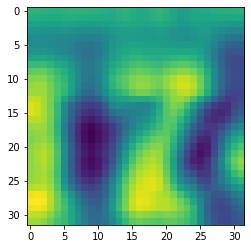

In [21]:
plt.imshow(my_number.reshape(32,32))

In [22]:
model.predict_classes(my_number.reshape(1,32,32,1))

array([7], dtype=int64)